In [ ]:
!mkdir mnist-data
!curl http://cis.jhu.edu/~sachin/digit/data0 --output mnist-data/data0
!curl http://cis.jhu.edu/~sachin/digit/data1 --output mnist-data/data1
!curl http://cis.jhu.edu/~sachin/digit/data2 --output mnist-data/data2
!curl http://cis.jhu.edu/~sachin/digit/data3 --output mnist-data/data3
!curl http://cis.jhu.edu/~sachin/digit/data4 --output mnist-data/data4
!curl http://cis.jhu.edu/~sachin/digit/data5 --output mnist-data/data5
!curl http://cis.jhu.edu/~sachin/digit/data6 --output mnist-data/data6
!curl http://cis.jhu.edu/~sachin/digit/data7 --output mnist-data/data7
!curl http://cis.jhu.edu/~sachin/digit/data8 --output mnist-data/data8
!curl http://cis.jhu.edu/~sachin/digit/data9 --output mnist-data/data9

In [1]:
import sys
sys.path.append('../../Hallgerd/')
import numpy as np
import pylab as plt
import hallgerd
from hallgerd.core import Sequential
from hallgerd.layers import Dense
from gunnar.core import Device

from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

In [2]:
d0 = np.fromfile('mnist-data/data0', dtype=np.uint8).reshape((1000, 28, 28))
d1 = np.fromfile('mnist-data/data1', dtype=np.uint8).reshape((1000, 28, 28))
d2 = np.fromfile('mnist-data/data2', dtype=np.uint8).reshape((1000, 28, 28))
d3 = np.fromfile('mnist-data/data3', dtype=np.uint8).reshape((1000, 28, 28))
d4 = np.fromfile('mnist-data/data4', dtype=np.uint8).reshape((1000, 28, 28))
d5 = np.fromfile('mnist-data/data5', dtype=np.uint8).reshape((1000, 28, 28))
d6 = np.fromfile('mnist-data/data6', dtype=np.uint8).reshape((1000, 28, 28))
d7 = np.fromfile('mnist-data/data7', dtype=np.uint8).reshape((1000, 28, 28))
d8 = np.fromfile('mnist-data/data8', dtype=np.uint8).reshape((1000, 28, 28))
d9 = np.fromfile('mnist-data/data9', dtype=np.uint8).reshape((1000, 28, 28))
dataX = np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9))
dataY = np.concatenate(([0]*1000, [1]*1000, [2]*1000, [3]*1000, [4]*1000, 
                        [5]*1000, [6]*1000, [7]*1000, [8]*1000, [9]*1000))

In [3]:
indices = np.random.permutation(10000)
dataX = dataX[indices]
dataY = dataY[indices]
dataX = dataX.reshape(10000, 784).T.astype(np.float32) / 255
dataY = OneHotEncoder(categories='auto', sparse=False).fit_transform(dataY.reshape(-1, 1)).T

In [4]:
dataX.shape, dataY.shape

((784, 10000), (10, 10000))

In [5]:
trainX, testX = dataX[:, :6000], dataX[:, 6000:]
trainY, testY = dataY[:, :6000], dataY[:, 6000:]

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


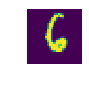

In [6]:
N = 42
print(trainY[:,N])
plt.figure(figsize=(1, 1)); plt.axis('off')
plt.imshow(trainX[:,N].reshape(28, 28))
plt.show()

In [7]:
devices = Device.getDevices()
dnames = [d for d in devices]

print('Found devices:\n\t{}'.format('\n\t'.join(dnames)))
print('\nUsing ', dnames[0])
gpu = Device([devices[dnames[0]]], DTYPE=np.float32, TS=32, TSK=32, WPTM=4, WPTN=4)

Found devices:
	GeForce GTX 660

Using  GeForce GTX 660


In [9]:
model = Sequential(gpu, lr=1e-1, batch_size=1024, epochs=15, loss='cross_entropy', verbose=True)
model.add(Dense(784, 512, activation='relu'))
model.add(Dense(512, 512, activation='relu'))
model.add(Dense(512, 10, activation='softmax'))

In [10]:
%%time
model.fit(trainX, trainY)

loss = -3371.304522010893: 100%|██████████| 15/15 [00:05<00:00,  2.97it/s] 

CPU times: user 3.7 s, sys: 1.37 s, total: 5.07 s
Wall time: 5.06 s


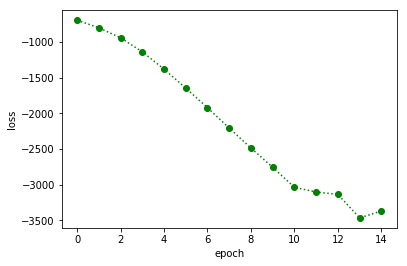

In [11]:
plt.plot(model.history['loss'], 'go:')
plt.xlabel('epoch'); plt.ylabel('loss')
plt.show()

In [12]:
yt = testY.argmax(axis=0)
ypp = model.predict(testX)
yp = ypp.argmax(axis=0)
print(classification_report(yt, yp))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       402
           1       0.90      0.95      0.92       409
           2       0.97      0.58      0.73       367
           3       0.78      0.75      0.76       385
           4       0.63      0.90      0.74       424
           5       0.00      0.00      0.00       416
           6       0.78      0.91      0.84       406
           7       0.56      0.95      0.70       379
           8       0.43      0.91      0.58       414
           9       0.00      0.00      0.00       398

    accuracy                           0.68      4000
   macro avg       0.60      0.68      0.62      4000
weighted avg       0.59      0.68      0.62      4000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
